# Import dependencies

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
import pylab 
from STED_analysis_functions import *

# Import TIFF files for confocal, STED and mask images

In [2]:
image_list_STAG1_eG1 = image_import(folder_path = "P:\\Andi\\STED\\2024-01-25_Replicate3_analysis\\eG1_STAG1", image_name = "CL009_Ibidi1_ChD_eG1_STAG1-EGFP-635P_CTCF-AF594.lif", number_of_images=5)
image_list_STAG2_eG1 = image_import(folder_path = "P:\\Andi\\STED\\2024-01-25_Replicate3_analysis\\eG1_STAG2", image_name = "CL009_Ibidi1_ChE_eG1_STAG2-EGFP-635P_CTCF-AF594.lif", number_of_images=5)
image_list_STAG1_G1 = image_import(folder_path = "P:\\Andi\\STED\\2024-01-25_Replicate3_analysis\\G1_STAG1", image_name = "CL009_Ibidi2_ChD_G1_STAG1-EGFP-635P_CTCF-AF594.lif", number_of_images=5)
image_list_STAG2_G1 = image_import(folder_path = "P:\\Andi\\STED\\2024-01-25_Replicate3_analysis\\G1_STAG2", image_name = "CL009_Ibidi2_ChE_G1_STAG2-EGFP-635P_CTCF-AF594.lif", number_of_images=5, start = 2)

P:\Andi\STED\2024-01-25_Replicate3_analysis\eG1_STAG1\CL009_Ibidi1_ChD_eG1_STAG1-EGFP-635P_CTCF-AF594.lif - Series001 loaded
P:\Andi\STED\2024-01-25_Replicate3_analysis\eG1_STAG1\CL009_Ibidi1_ChD_eG1_STAG1-EGFP-635P_CTCF-AF594.lif - Series002 loaded
P:\Andi\STED\2024-01-25_Replicate3_analysis\eG1_STAG1\CL009_Ibidi1_ChD_eG1_STAG1-EGFP-635P_CTCF-AF594.lif - Series003 loaded
P:\Andi\STED\2024-01-25_Replicate3_analysis\eG1_STAG1\CL009_Ibidi1_ChD_eG1_STAG1-EGFP-635P_CTCF-AF594.lif - Series004 loaded
P:\Andi\STED\2024-01-25_Replicate3_analysis\eG1_STAG1\CL009_Ibidi1_ChD_eG1_STAG1-EGFP-635P_CTCF-AF594.lif - Series005 loaded
P:\Andi\STED\2024-01-25_Replicate3_analysis\eG1_STAG2\CL009_Ibidi1_ChE_eG1_STAG2-EGFP-635P_CTCF-AF594.lif - Series001 loaded
P:\Andi\STED\2024-01-25_Replicate3_analysis\eG1_STAG2\CL009_Ibidi1_ChE_eG1_STAG2-EGFP-635P_CTCF-AF594.lif - Series002 loaded
P:\Andi\STED\2024-01-25_Replicate3_analysis\eG1_STAG2\CL009_Ibidi1_ChE_eG1_STAG2-EGFP-635P_CTCF-AF594.lif - Series003 loaded


In [3]:
image_list_STAG2_EGFP_AID_native = image_import(folder_path = "P:\\Andi\\STED\\2024-01-25_Replicate3_analysis\\G1_STAG2-EGFP-AID_native", image_name = "CL009_Ibidi3_ChB_native.lif", number_of_images=5)
image_list_STAG2_EGFP_AID_IAA = image_import(folder_path = "P:\\Andi\\STED\\2024-01-25_Replicate3_analysis\\G1_STAG2-EGFP-AID_IAA", image_name = "CL009_Ibidi3_ChC_+IAA.lif", number_of_images=5)

P:\Andi\STED\2024-01-25_Replicate3_analysis\G1_STAG2-EGFP-AID_native\CL009_Ibidi3_ChB_native.lif - Series001 loaded
P:\Andi\STED\2024-01-25_Replicate3_analysis\G1_STAG2-EGFP-AID_native\CL009_Ibidi3_ChB_native.lif - Series002 loaded
P:\Andi\STED\2024-01-25_Replicate3_analysis\G1_STAG2-EGFP-AID_native\CL009_Ibidi3_ChB_native.lif - Series003 loaded
P:\Andi\STED\2024-01-25_Replicate3_analysis\G1_STAG2-EGFP-AID_native\CL009_Ibidi3_ChB_native.lif - Series004 loaded
P:\Andi\STED\2024-01-25_Replicate3_analysis\G1_STAG2-EGFP-AID_native\CL009_Ibidi3_ChB_native.lif - Series005 loaded
P:\Andi\STED\2024-01-25_Replicate3_analysis\G1_STAG2-EGFP-AID_IAA\CL009_Ibidi3_ChC_+IAA.lif - Series001 loaded
P:\Andi\STED\2024-01-25_Replicate3_analysis\G1_STAG2-EGFP-AID_IAA\CL009_Ibidi3_ChC_+IAA.lif - Series002 loaded
P:\Andi\STED\2024-01-25_Replicate3_analysis\G1_STAG2-EGFP-AID_IAA\CL009_Ibidi3_ChC_+IAA.lif - Series003 loaded
P:\Andi\STED\2024-01-25_Replicate3_analysis\G1_STAG2-EGFP-AID_IAA\CL009_Ibidi3_ChC_+IAA

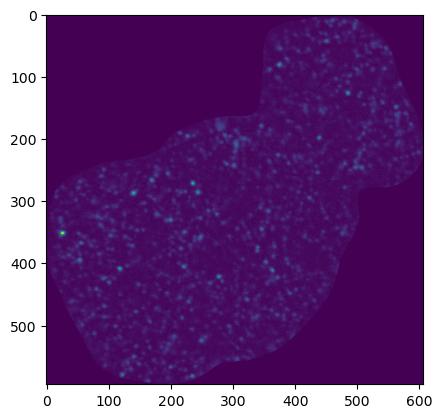

In [6]:
# optional image check
# plt.imshow(image_list_STAG1_eG1[2][3]) #Series 2, channel 3 (ch3 = confocal image of CTCF)


# Spot analysis
I chose to go for threshold fact of 1.0 here, because background appeared more severe in this replicate


In [7]:
eG1_STAG1_C1_result, eG1_STAG1_C2_result, eG1_STAG1_C3_result, eG1_STAG1_C4_result = spot_summary_confocal_and_STED(image_list_STAG1_eG1, threshold_fact = 1.0)

  0%|          | 0/5 [00:00<?, ?it/s]

Coarse segmentation DONE, threshold = 8.476469039916992
START refined segmentation.


100%|██████████| 352/352 [00:03<00:00, 113.81it/s]


MAX spot_labels number: 612
Coarse segmentation DONE, threshold = 13.684732437133789
START refined segmentation.


 20%|██        | 1/5 [00:07<00:28,  7.05s/it]

MAX spot_labels number: 447
Channel 1 & 2: Number of spots passed QC:  611  Number of small spots removed:  0
Channel 3 & 4: Number of spots passed QC:  447  Number of small spots removed:  0
Coarse segmentation DONE, threshold = 6.718396186828613
START refined segmentation.


100%|██████████| 407/407 [00:05<00:00, 79.69it/s]


MAX spot_labels number: 275
Coarse segmentation DONE, threshold = 15.167989730834961
START refined segmentation.


100%|██████████| 371/371 [00:04<00:00, 81.29it/s]


MAX spot_labels number: 305


 40%|████      | 2/5 [00:18<00:28,  9.66s/it]

Channel 1 & 2: Number of spots passed QC:  275  Number of small spots removed:  0
Channel 3 & 4: Number of spots passed QC:  305  Number of small spots removed:  0
Coarse segmentation DONE, threshold = 6.653586387634277
START refined segmentation.


100%|██████████| 386/386 [00:05<00:00, 68.60it/s]


MAX spot_labels number: 713
Coarse segmentation DONE, threshold = 14.204261779785156
START refined segmentation.


 60%|██████    | 3/5 [00:32<00:23, 11.63s/it]

MAX spot_labels number: 617
Channel 1 & 2: Number of spots passed QC:  704  Number of small spots removed:  7
Channel 3 & 4: Number of spots passed QC:  617  Number of small spots removed:  0
Coarse segmentation DONE, threshold = 7.640422821044922
START refined segmentation.


100%|██████████| 408/408 [00:05<00:00, 70.72it/s]


MAX spot_labels number: 817
Coarse segmentation DONE, threshold = 11.789180755615234
START refined segmentation.


 80%|████████  | 4/5 [00:45<00:11, 11.99s/it]

MAX spot_labels number: 459
Channel 1 & 2: Number of spots passed QC:  810  Number of small spots removed:  4
Channel 3 & 4: Number of spots passed QC:  459  Number of small spots removed:  0
Coarse segmentation DONE, threshold = 8.513879776000977
START refined segmentation.


100%|██████████| 384/384 [00:04<00:00, 80.22it/s]


MAX spot_labels number: 615
Coarse segmentation DONE, threshold = 13.227030754089355
START refined segmentation.


100%|██████████| 435/435 [00:05<00:00, 81.69it/s]


MAX spot_labels number: 653
Channel 1 & 2: Number of spots passed QC:  612  Number of small spots removed:  1
Channel 3 & 4: Number of spots passed QC:  653  Number of small spots removed:  0


100%|██████████| 5/5 [00:56<00:00, 11.35s/it]


In [20]:
eG1_STAG2_C1_result, eG1_STAG2_C2_result, eG1_STAG2_C3_result, eG1_STAG2_C4_result = spot_summary_confocal_and_STED(image_list_STAG2_eG1, threshold_fact = 1.0)

  0%|          | 0/5 [00:00<?, ?it/s]

Coarse segmentation DONE, threshold = 9.39905071258545
START refined segmentation.


100%|██████████| 297/297 [00:02<00:00, 113.79it/s]


MAX spot_labels number: 623
Coarse segmentation DONE, threshold = 16.758262634277344
START refined segmentation.


 20%|██        | 1/5 [00:06<00:26,  6.63s/it]

MAX spot_labels number: 252
Channel 1 & 2: Number of spots passed QC:  617  Number of small spots removed:  2
Channel 3 & 4: Number of spots passed QC:  252  Number of small spots removed:  0
Coarse segmentation DONE, threshold = 9.367555618286133
START refined segmentation.


100%|██████████| 260/260 [00:04<00:00, 60.20it/s]


MAX spot_labels number: 829
Coarse segmentation DONE, threshold = 13.402107238769531
START refined segmentation.


100%|██████████| 415/415 [00:08<00:00, 48.30it/s]


MAX spot_labels number: 634
Channel 1 & 2: Number of spots passed QC:  826  Number of small spots removed:  2
Channel 3 & 4: Number of spots passed QC:  632  Number of small spots removed:  2


 40%|████      | 2/5 [00:21<00:35, 11.73s/it]

Coarse segmentation DONE, threshold = 6.806878566741943
START refined segmentation.


100%|██████████| 324/324 [00:05<00:00, 55.95it/s]


MAX spot_labels number: 814
Coarse segmentation DONE, threshold = 14.10981559753418
START refined segmentation.


100%|██████████| 420/420 [00:07<00:00, 57.59it/s]


MAX spot_labels number: 622
Channel 1 & 2: Number of spots passed QC:  806  Number of small spots removed:  3


 60%|██████    | 3/5 [00:37<00:27, 13.51s/it]

Channel 3 & 4: Number of spots passed QC:  621  Number of small spots removed:  1
Coarse segmentation DONE, threshold = 5.654862403869629
START refined segmentation.


100%|██████████| 263/263 [00:04<00:00, 62.33it/s]


MAX spot_labels number: 775
Coarse segmentation DONE, threshold = 11.479122161865234
START refined segmentation.


 80%|████████  | 4/5 [00:48<00:12, 12.43s/it]

MAX spot_labels number: 689
Channel 1 & 2: Number of spots passed QC:  766  Number of small spots removed:  7
Channel 3 & 4: Number of spots passed QC:  683  Number of small spots removed:  4
Coarse segmentation DONE, threshold = 7.722293853759766
START refined segmentation.


100%|██████████| 326/326 [00:05<00:00, 64.25it/s]


MAX spot_labels number: 776
Coarse segmentation DONE, threshold = 12.993011474609375
START refined segmentation.


100%|██████████| 5/5 [01:00<00:00, 12.51s/it]

MAX spot_labels number: 681
Channel 1 & 2: Number of spots passed QC:  772  Number of small spots removed:  3
Channel 3 & 4: Number of spots passed QC:  678  Number of small spots removed:  3


100%|██████████| 5/5 [01:00<00:00, 12.20s/it]


In [21]:
G1_STAG1_C1_result, G1_STAG1_C2_result, G1_STAG1_C3_result, G1_STAG1_C4_result = spot_summary_confocal_and_STED(image_list_STAG1_G1, threshold_fact = 1.0)

  0%|          | 0/5 [00:00<?, ?it/s]

Coarse segmentation DONE, threshold = 9.241495132446289
START refined segmentation.


100%|██████████| 495/495 [00:08<00:00, 58.73it/s]


MAX spot_labels number: 525
Coarse segmentation DONE, threshold = 15.769973754882812
START refined segmentation.


100%|██████████| 468/468 [00:07<00:00, 60.59it/s]


MAX spot_labels number: 569
Channel 1 & 2: Number of spots passed QC:  525  Number of small spots removed:  0


 20%|██        | 1/5 [00:18<01:15, 18.83s/it]

Channel 3 & 4: Number of spots passed QC:  569  Number of small spots removed:  0
Coarse segmentation DONE, threshold = 8.015239715576172
START refined segmentation.


100%|██████████| 642/642 [00:16<00:00, 38.74it/s]


MAX spot_labels number: 1274
Coarse segmentation DONE, threshold = 13.463373184204102
START refined segmentation.


100%|██████████| 679/679 [00:17<00:00, 38.73it/s]


MAX spot_labels number: 1357
Channel 1 & 2: Number of spots passed QC:  1263  Number of small spots removed:  9


 40%|████      | 2/5 [00:56<01:29, 29.99s/it]

Channel 3 & 4: Number of spots passed QC:  1351  Number of small spots removed:  4
Coarse segmentation DONE, threshold = 7.661923408508301
START refined segmentation.


100%|██████████| 653/653 [00:15<00:00, 42.36it/s]


MAX spot_labels number: 1270
Coarse segmentation DONE, threshold = 12.9278564453125
START refined segmentation.


100%|██████████| 763/763 [00:17<00:00, 42.69it/s]


MAX spot_labels number: 1302
Channel 1 & 2: Number of spots passed QC:  1262  Number of small spots removed:  6


 60%|██████    | 3/5 [01:33<01:06, 33.20s/it]

Channel 3 & 4: Number of spots passed QC:  1300  Number of small spots removed:  1
Coarse segmentation DONE, threshold = 9.451051712036133
START refined segmentation.


100%|██████████| 749/749 [00:19<00:00, 38.03it/s]


MAX spot_labels number: 688
Coarse segmentation DONE, threshold = 14.829914093017578
START refined segmentation.


100%|██████████| 829/829 [00:21<00:00, 38.44it/s]


MAX spot_labels number: 740
Channel 1 & 2: Number of spots passed QC:  686  Number of small spots removed:  1


 80%|████████  | 4/5 [02:19<00:38, 38.22s/it]

Channel 3 & 4: Number of spots passed QC:  740  Number of small spots removed:  0
Coarse segmentation DONE, threshold = 8.014824867248535
START refined segmentation.


100%|██████████| 750/750 [00:17<00:00, 42.41it/s]


MAX spot_labels number: 1194
Coarse segmentation DONE, threshold = 16.685924530029297
START refined segmentation.


100%|██████████| 810/810 [00:18<00:00, 43.03it/s]


MAX spot_labels number: 1109
Channel 1 & 2: Number of spots passed QC:  1188  Number of small spots removed:  6


100%|██████████| 5/5 [02:59<00:00, 35.95s/it]

Channel 3 & 4: Number of spots passed QC:  1108  Number of small spots removed:  0


In [22]:
G1_STAG2_C1_result, G1_STAG2_C2_result, G1_STAG2_C3_result, G1_STAG2_C4_result = spot_summary_confocal_and_STED(image_list_STAG2_G1, threshold_fact = 1.0)

  0%|          | 0/4 [00:00<?, ?it/s]

Coarse segmentation DONE, threshold = 15.115682601928711
START refined segmentation.


100%|██████████| 771/771 [00:20<00:00, 37.94it/s]


MAX spot_labels number: 1651
Coarse segmentation DONE, threshold = 16.2974853515625
START refined segmentation.


100%|██████████| 863/863 [00:22<00:00, 37.95it/s]


MAX spot_labels number: 1245
Channel 1 & 2: Number of spots passed QC:  1642  Number of small spots removed:  6


 25%|██▌       | 1/4 [00:47<02:21, 47.19s/it]

Channel 3 & 4: Number of spots passed QC:  1241  Number of small spots removed:  4
Coarse segmentation DONE, threshold = 14.226286888122559
START refined segmentation.


100%|██████████| 662/662 [00:18<00:00, 36.28it/s]


MAX spot_labels number: 1775
Coarse segmentation DONE, threshold = 13.716741561889648
START refined segmentation.


100%|██████████| 748/748 [00:20<00:00, 36.68it/s]


MAX spot_labels number: 926


 50%|█████     | 2/4 [01:29<01:29, 44.55s/it]

Channel 1 & 2: Number of spots passed QC:  1767  Number of small spots removed:  7
Channel 3 & 4: Number of spots passed QC:  926  Number of small spots removed:  0
Coarse segmentation DONE, threshold = 13.209403038024902
START refined segmentation.


100%|██████████| 599/599 [00:16<00:00, 37.29it/s]


MAX spot_labels number: 1140
Coarse segmentation DONE, threshold = 14.91969108581543
START refined segmentation.


100%|██████████| 786/786 [00:20<00:00, 37.45it/s]


MAX spot_labels number: 728
Channel 1 & 2: Number of spots passed QC:  1134  Number of small spots removed:  3


 75%|███████▌  | 3/4 [02:11<00:43, 43.22s/it]

Channel 3 & 4: Number of spots passed QC:  728  Number of small spots removed:  0
Coarse segmentation DONE, threshold = 12.732881546020508
START refined segmentation.


100%|██████████| 607/607 [00:15<00:00, 40.39it/s]


MAX spot_labels number: 1672
Coarse segmentation DONE, threshold = 14.0240478515625
START refined segmentation.


100%|██████████| 813/813 [00:20<00:00, 39.90it/s]


MAX spot_labels number: 1324
Channel 1 & 2: Number of spots passed QC:  1659  Number of small spots removed:  9


100%|██████████| 4/4 [02:51<00:00, 42.75s/it]

Channel 3 & 4: Number of spots passed QC:  1321  Number of small spots removed:  1


In [4]:
G1_STAG2_AID_native_C1_result, G1_STAG2_AID_native_C2_result, G1_STAG2_AID_native_C3_result, G1_STAG2_AID_native_C4_result = spot_summary_confocal_and_STED(image_list_STAG2_EGFP_AID_native, threshold_fact = 1.1)

  0%|          | 0/5 [00:00<?, ?it/s]

Coarse segmentation DONE, threshold = 12.028322124481202
START refined segmentation.


100%|██████████| 855/855 [00:22<00:00, 38.71it/s]


MAX spot_labels number: 1630
Coarse segmentation DONE, threshold = 18.57786636352539
START refined segmentation.


100%|██████████| 955/955 [00:24<00:00, 39.28it/s]


MAX spot_labels number: 936
Channel 1 & 2: Number of spots passed QC:  1624  Number of small spots removed:  5


 20%|██        | 1/5 [00:51<03:24, 51.08s/it]

Channel 3 & 4: Number of spots passed QC:  935  Number of small spots removed:  0
Coarse segmentation DONE, threshold = 14.621522903442385
START refined segmentation.


100%|██████████| 736/736 [00:20<00:00, 36.67it/s]


MAX spot_labels number: 1696
Coarse segmentation DONE, threshold = 17.98859443664551
START refined segmentation.


100%|██████████| 917/917 [00:25<00:00, 36.13it/s]


MAX spot_labels number: 1484


 40%|████      | 2/5 [01:41<02:31, 50.43s/it]

Channel 1 & 2: Number of spots passed QC:  1687  Number of small spots removed:  2
Channel 3 & 4: Number of spots passed QC:  1476  Number of small spots removed:  4
Coarse segmentation DONE, threshold = 13.344578933715821
START refined segmentation.


100%|██████████| 786/786 [00:24<00:00, 31.76it/s]


MAX spot_labels number: 1459
Coarse segmentation DONE, threshold = 16.469909286499025
START refined segmentation.


100%|██████████| 994/994 [00:32<00:00, 30.90it/s]


MAX spot_labels number: 1516


 60%|██████    | 3/5 [02:43<01:51, 55.83s/it]

Channel 1 & 2: Number of spots passed QC:  1454  Number of small spots removed:  3
Channel 3 & 4: Number of spots passed QC:  1512  Number of small spots removed:  2
Coarse segmentation DONE, threshold = 16.339091682434084
START refined segmentation.


100%|██████████| 730/730 [00:15<00:00, 47.16it/s]


MAX spot_labels number: 1344
Coarse segmentation DONE, threshold = 18.886943435668947
START refined segmentation.


100%|██████████| 800/800 [00:17<00:00, 46.86it/s]


MAX spot_labels number: 1186
Channel 1 & 2: Number of spots passed QC:  1338  Number of small spots removed:  4
Channel 3 & 4: Number of spots passed QC:  1181  Number of small spots removed:  4


 80%|████████  | 4/5 [03:19<00:47, 47.93s/it]

Coarse segmentation DONE, threshold = 9.467494773864747
START refined segmentation.


100%|██████████| 729/729 [00:22<00:00, 32.34it/s]


MAX spot_labels number: 1727
Coarse segmentation DONE, threshold = 17.17476673126221
START refined segmentation.


100%|██████████| 843/843 [00:26<00:00, 31.96it/s]


MAX spot_labels number: 1412


100%|██████████| 5/5 [04:13<00:00, 50.07s/it]

Channel 1 & 2: Number of spots passed QC:  1709  Number of small spots removed:  15
Channel 3 & 4: Number of spots passed QC:  1411  Number of small spots removed:  1


100%|██████████| 5/5 [04:13<00:00, 50.60s/it]


In [5]:
G1_STAG2_AID_C1_result, G1_STAG2_AID_C2_result, G1_STAG2_AID_C3_result, G1_STAG2_AID_C4_result = spot_summary_confocal_and_STED(image_list_STAG2_EGFP_AID_IAA, threshold_fact = 1.1)

  0%|          | 0/5 [00:00<?, ?it/s]

Coarse segmentation DONE, threshold = 7.978674793243409
START refined segmentation.


100%|██████████| 783/783 [00:16<00:00, 47.27it/s]


MAX spot_labels number: 1159
Coarse segmentation DONE, threshold = 21.865420532226565
START refined segmentation.


100%|██████████| 740/740 [00:15<00:00, 47.45it/s]


MAX spot_labels number: 1043
Channel 1 & 2: Number of spots passed QC:  1156  Number of small spots removed:  1


 20%|██        | 1/5 [00:35<02:21, 35.37s/it]

Channel 3 & 4: Number of spots passed QC:  1043  Number of small spots removed:  0
Coarse segmentation DONE, threshold = 7.776556968688966
START refined segmentation.


100%|██████████| 840/840 [00:23<00:00, 35.90it/s]


MAX spot_labels number: 1381
Coarse segmentation DONE, threshold = 17.948957443237305
START refined segmentation.


100%|██████████| 777/777 [00:21<00:00, 36.27it/s]


MAX spot_labels number: 922
Channel 1 & 2: Number of spots passed QC:  1376  Number of small spots removed:  3


 40%|████      | 2/5 [01:24<02:10, 43.53s/it]

Channel 3 & 4: Number of spots passed QC:  920  Number of small spots removed:  2
Coarse segmentation DONE, threshold = 5.440489959716797
START refined segmentation.


100%|██████████| 639/639 [00:12<00:00, 49.89it/s]


MAX spot_labels number: 842
Coarse segmentation DONE, threshold = 18.690474700927737
START refined segmentation.


100%|██████████| 743/743 [00:16<00:00, 45.32it/s]


MAX spot_labels number: 1101
Channel 1 & 2: Number of spots passed QC:  835  Number of small spots removed:  5
Channel 3 & 4: Number of spots passed QC:  1096  Number of small spots removed:  3


 60%|██████    | 3/5 [01:56<01:16, 38.29s/it]

Coarse segmentation DONE, threshold = 4.416759490966797
START refined segmentation.


100%|██████████| 801/801 [00:20<00:00, 38.91it/s]


MAX spot_labels number: 602
Coarse segmentation DONE, threshold = 15.387526893615723
START refined segmentation.


100%|██████████| 742/742 [00:19<00:00, 38.75it/s]


MAX spot_labels number: 1233
Channel 1 & 2: Number of spots passed QC:  602  Number of small spots removed:  0
Channel 3 & 4: Number of spots passed QC:  1230  Number of small spots removed:  2


 80%|████████  | 4/5 [02:40<00:40, 40.64s/it]

Coarse segmentation DONE, threshold = 6.094177246093751
START refined segmentation.


100%|██████████| 847/847 [00:26<00:00, 32.42it/s]


MAX spot_labels number: 1010
Coarse segmentation DONE, threshold = 19.00353183746338
START refined segmentation.


100%|██████████| 826/826 [00:25<00:00, 32.88it/s]


MAX spot_labels number: 1450


100%|██████████| 5/5 [03:37<00:00, 43.47s/it]

Channel 1 & 2: Number of spots passed QC:  1008  Number of small spots removed:  2
Channel 3 & 4: Number of spots passed QC:  1446  Number of small spots removed:  3


# get numbers of sampled volume and extracted spots

In [100]:
numlis = list()
intlis = list()
arealis = list()
for name, values in G1_STAG1_C4_result.groupby('image'):
    length = len(values)
    intensity = np.median(values['intensity_mean'])
    area = values['area_mask'][0] * 0.01888 * 0.01888 #(0.01888 is pixel size)
    numlis.append(length)
    intlis.append(intensity)
    arealis.append(area)
print("Mean number: ", np.mean(numlis), "\nMean area: ", np.mean(arealis))

Mean number:  1228.4 
Mean area:  133.24058728448


Mean spot intensity of df1 (color = black): 	33.38,	median spot intensity: 32.26
Mean spot intensity of df2 (color = blue): 	43.12,	median spot intensity: 41.88


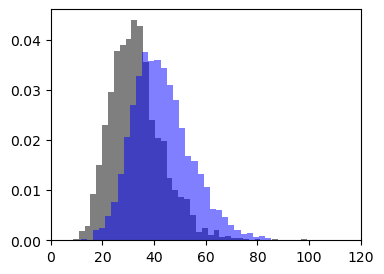

In [104]:
compare_spot_intensity(eG1_STAG1_C3_result, G1_STAG1_C3_result, 'black', 'blue', ylim_max = 120, save = False, path = None)

Mean spot intensity of df1 (color = black): 	41.83,	median spot intensity: 40.93
Mean spot intensity of df2 (color = blue): 	40.58,	median spot intensity: 39.75


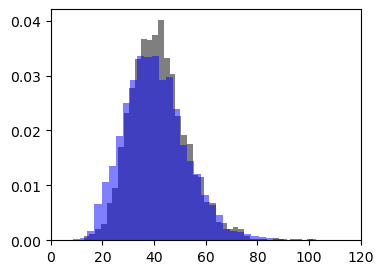

In [105]:
compare_spot_intensity(eG1_STAG2_C3_result, G1_STAG2_C3_result, 'black', 'blue', ylim_max = 120, save = False, path = None)

Mean spot intensity of df1 (color = black): 	12.37,	median spot intensity: 12.02
Mean spot intensity of df2 (color = red): 	13.61,	median spot intensity: 13.06


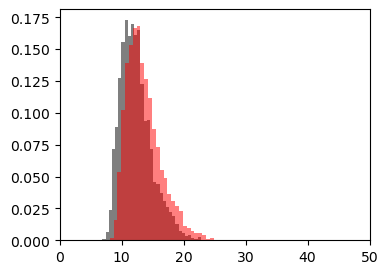

In [106]:
compare_spot_intensity(eG1_STAG1_C2_result, G1_STAG1_C2_result, 'black', 'red', ylim_max = 50, save = False, path = None)

Mean spot intensity of df1 (color = black): 	12.92,	median spot intensity: 12.62
Mean spot intensity of df2 (color = red): 	21.79,	median spot intensity: 21.02


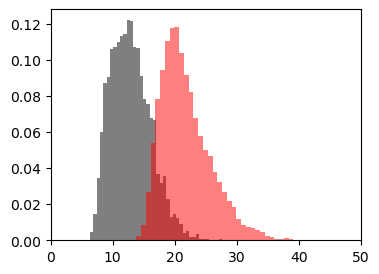

In [107]:
compare_spot_intensity(eG1_STAG2_C2_result, G1_STAG2_C2_result, 'black', 'red', ylim_max = 50, save = False, path = None)

note that EGFP-AID has been done with old nanobody, contrary to eG1/G1 replicate data!

Mean spot intensity of df1 (color = purple): 	11.1,	median spot intensity: 10.93
Mean spot intensity of df2 (color = black): 	20.65,	median spot intensity: 20.29


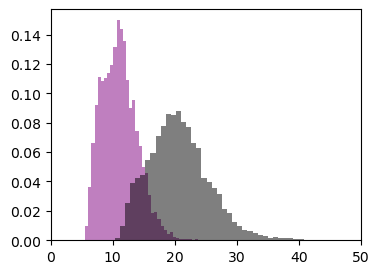

In [7]:
compare_spot_intensity(G1_STAG2_AID_C2_result, G1_STAG2_AID_native_C2_result, 'purple','black', xlim_max = 50, save = False, path = None)

Mean spot intensity of df1 (color = purple): 	21.4,	median spot intensity: 20.67
Mean spot intensity of df2 (color = black): 	53.53,	median spot intensity: 52.85


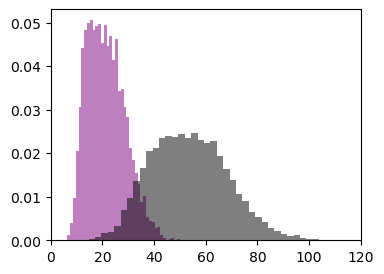

In [11]:
compare_spot_intensity(G1_STAG2_AID_C1_result, G1_STAG2_AID_native_C1_result, 'purple','black', xlim_max = 120, save = False, path = None)